<a href="https://colab.research.google.com/github/IT20609030-Manisha/DL_Lab2/blob/main/Ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.regularizers import l1,l2 #import regulations
from sklearn.metrics import confusion_matrix #import confusion_matrix
import seaborn as sns


Load the MNIST dataset

In [43]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [2 0 2 4 5 7 0 4 6 3]


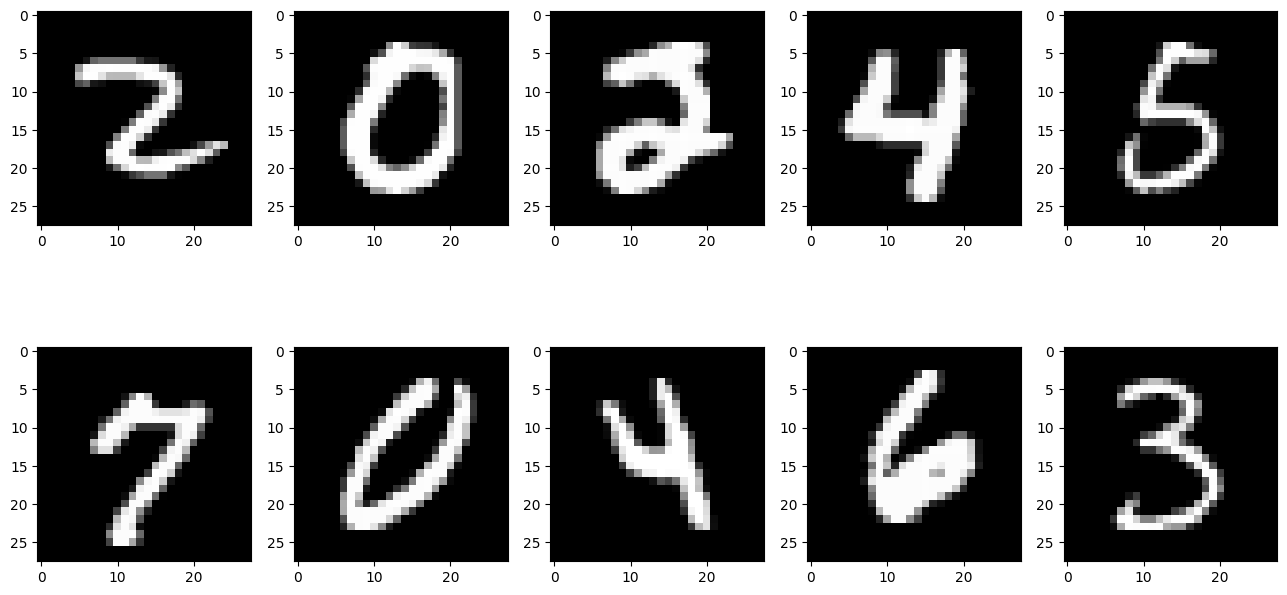

In [44]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [45]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [46]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(50,activation='relu', kernel_regularizer=l1(0.001))) #L1 regularization
model.add(Dense(50,input_dim=64,activation='relu', kernel_regularizer=l2(0.001))) #L2 regularization
model.add(Dense(20,input_dim=64,activation='relu', kernel_regularizer=l1(0.001))) #L1 regularization
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 50)                39250     
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 20)                1020      
                                                                 
 dense_18 (Dense)            (None, 10)                210       
                                                                 
Total params: 43,030
Trainable params: 43,030
Non-trainable params: 0
_________________________________________________________________


Train the model

In [48]:
train_info = model.fit(new_train_data , new_train_target , epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.8856 - accuracy: 0.8729
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5986 - accuracy: 0.9234
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5262 - accuracy: 0.9354
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4876 - accuracy: 0.9412
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4591 - accuracy: 0.9442
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4374 - accuracy: 0.9465
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4223 - accuracy: 0.9482
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4077 - accuracy: 0.9493
Epoch 9/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3968 - accuracy: 0.9501
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.391

Plot the loss and accuracy graphs

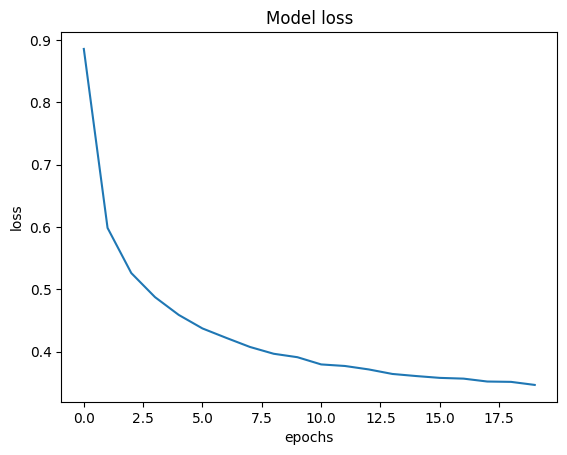

In [49]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

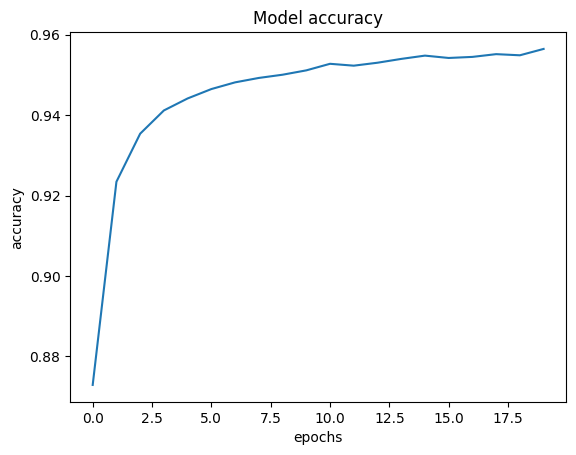

In [50]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [51]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.9589
Loss of the Test dataset is: 0.3369547724723816
Accuracy of the test dataset is: 0.958899974822998


Save the model weights

In [52]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

In [54]:
#Generate predictions on the test dataset
predictions = model.predict(new_test_data)
predicted_lables = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


In [58]:
#Generate confusion matrix
confusion_mtx = confusion_matrix(test_target, predicted_lables)

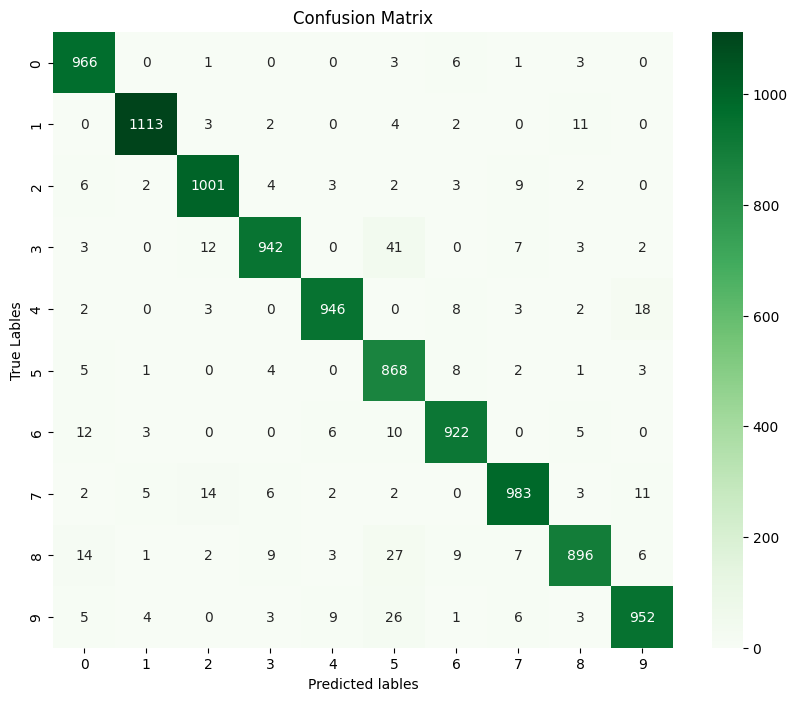

In [65]:
#Plot confusion matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Greens', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted lables')
plt.ylabel('True Lables')
plt.title('Confusion Matrix')
plt.show()